In [13]:
from ORF_package.orf_package import *
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import LinearLocator
import mpl_toolkits.mplot3d.axes3d as axes3d

# Toy model $\hat{u}=\hat{x}$, $\hat{v}=\hat{y}$

## Small-antenna limit (f = 0 Hz)

In [14]:
theta, phi = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
THETA, PHI = np.meshgrid(theta, phi)

R_cross, R_plus = np.abs(Antenna_patterns_full(f = 0, theta = THETA, phi = PHI, u = [1,0,0], v = [0,1,0] , L = 4000))
R_pattern = np.sqrt(np.square(np.abs(R_cross))+np.square(np.abs(R_plus)))

Default paarmeters for az.azim, az.elev, az.dist are -60 10 30

### $F_{+}$

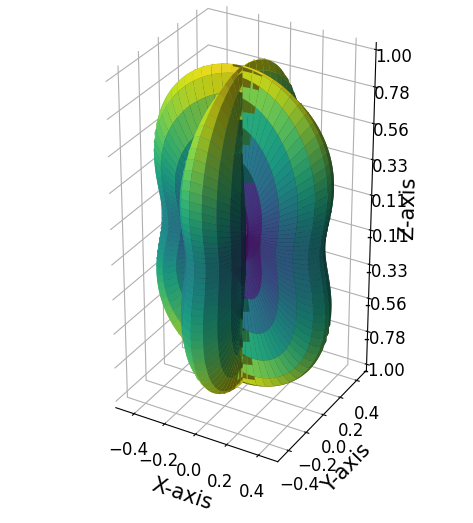

In [15]:
X_cross = R_cross * np.sin(THETA) * np.cos(PHI)
Y_cross = R_cross * np.sin(THETA) * np.sin(PHI)
Z_cross = R_cross * np.cos(THETA)

color_dimension = R_cross # change to desired fourth dimension
#print(np.shape(color_dimension))

minn, maxx = color_dimension.min(), color_dimension.max()
norm = colors.Normalize(minn, maxx)
m = cm.ScalarMappable(norm=norm, cmap='viridis')
m.set_array([])
fcolors = m.to_rgba(color_dimension)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X_cross, Y_cross, Z_cross,
                       linewidth=0, antialiased=True, alpha=1, facecolors=fcolors)

# Customize the z axis.
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-1, 1)
ax.set_box_aspect(aspect=(1, 1, 2))


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)


#play with visualization
#ax.azim=-60

plt.savefig("R_plus_python.pdf", bbox_inches = "tight")
plt.show()
plt.close()

### $F_{\times}$

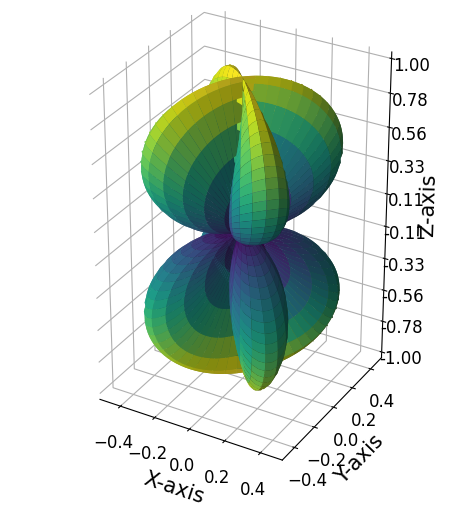

In [16]:
X_plus = R_plus * np.sin(THETA) * np.cos(PHI)
Y_plus = R_plus * np.sin(THETA) * np.sin(PHI)
Z_plus = R_plus * np.cos(THETA)

color_dimension = R_plus # change to desired fourth dimension
#print(np.shape(color_dimension))

minn, maxx = color_dimension.min(), color_dimension.max()
norm = colors.Normalize(minn, maxx)
m = cm.ScalarMappable(norm=norm, cmap='viridis')
m.set_array([])
fcolors = m.to_rgba(color_dimension)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X_plus, Y_plus, Z_plus,
                       linewidth=0, antialiased=True, alpha=1, facecolors=fcolors)

# Customize the z axis.
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-1, 1)
ax.set_box_aspect(aspect=(1, 1, 1/0.6))

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)


#play with visualization
#ax.azim=-45

plt.savefig("R_cross_python.pdf", bbox_inches = "tight")
plt.show()
plt.close()

### $F_{\rm unpolarised}$

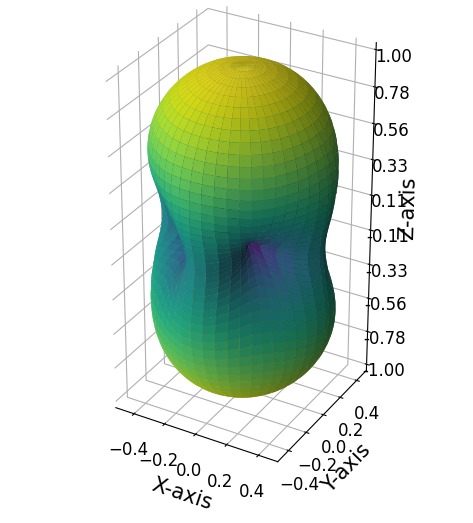

In [17]:
X_pattern = R_pattern * np.sin(THETA) * np.cos(PHI)
Y_pattern = R_pattern * np.sin(THETA) * np.sin(PHI)
Z_pattern = R_pattern * np.cos(THETA)

color_dimension = R_pattern # change to desired fourth dimension
#print(np.shape(color_dimension))

minn, maxx = color_dimension.min(), color_dimension.max()
norm = colors.Normalize(minn, maxx)
m = cm.ScalarMappable(norm=norm, cmap='viridis')
m.set_array([])
fcolors = m.to_rgba(color_dimension)
#print(np.shape(fcolors))

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X_pattern, Y_pattern, Z_pattern,  
    linewidth=0, antialiased=True, alpha=1, facecolors=fcolors)#, edgecolors = "yellow")

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-1, 1)
ax.set_box_aspect(aspect=(1, 1, 2))


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

ax.set_box_aspect(aspect=(1, 1, 2))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(plot, shrink=0.5, aspect=5)


#play with visualization
#ax.azim=-45

plt.savefig("R_unpolarised_python.pdf", bbox_inches = "tight")
plt.show()
plt.close()


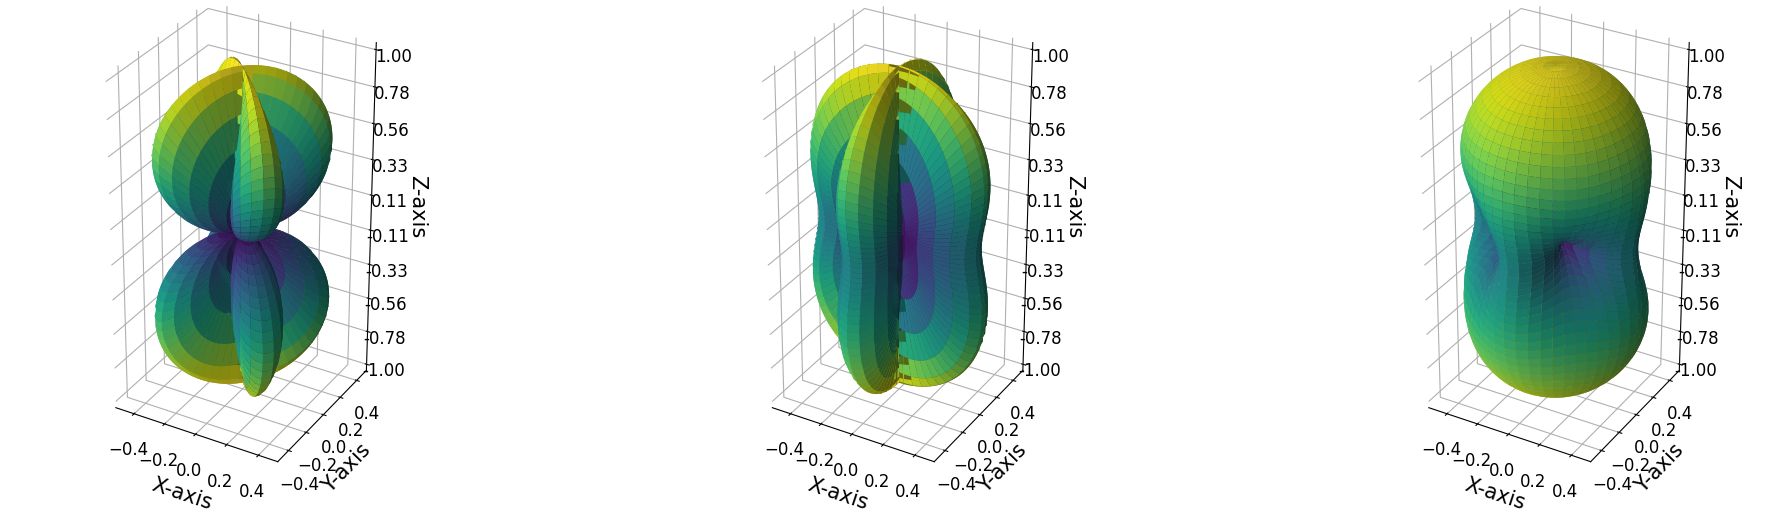

In [18]:
fig = plt.figure(figsize = (24,6))

Xs = [X_plus, X_cross, X_pattern]
Ys = [Y_plus, Y_cross, Y_pattern]
Zs = [Z_plus, Z_cross, Z_pattern]
Rs = [R_plus, R_cross, R_pattern]

for X, Y, Z, R,i in zip(Xs, Ys, Zs,Rs,[1,2,3]):
    
    color_dimension = R # change to desired fourth dimension
    #print(np.shape(color_dimension))

    minn, maxx = color_dimension.min(), color_dimension.max()
    norm = colors.Normalize(minn, maxx)
    m = cm.ScalarMappable(norm=norm, cmap='viridis')
    m.set_array([])
    fcolors = m.to_rgba(color_dimension)
    #print(np.shape(fcolors))
    
    
    ax = fig.add_subplot(1,3,i, projection='3d')
    plot = ax.plot_surface(
    X, Y, Z,  
    linewidth=0, antialiased=True, alpha=1, facecolors=fcolors)#, edgecolors = "yellow")

    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(-1, 1)
    ax.set_box_aspect(aspect=(1, 1, 2))


    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.zaxis.set_rotate_label(False)  # disable automatic rotation
    ax.set_zlabel("Z-axis", labelpad = 10, rotation = 270)

    ax.set_box_aspect(aspect=(1, 1, 2))
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')
plt.savefig("./Antenna_patterns.pdf", bbox_inches="tight")
plt.show()
plt.close()

In [19]:
import matplotlib

# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize-5, #* 2,
    "xtick.labelsize": fontsize-8,
    "ytick.labelsize": fontsize-8,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    #"text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (8, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

0.007934978877488952 0.9999999999999999
0.0 0.999874127673875
0.017737793853820905 1.0


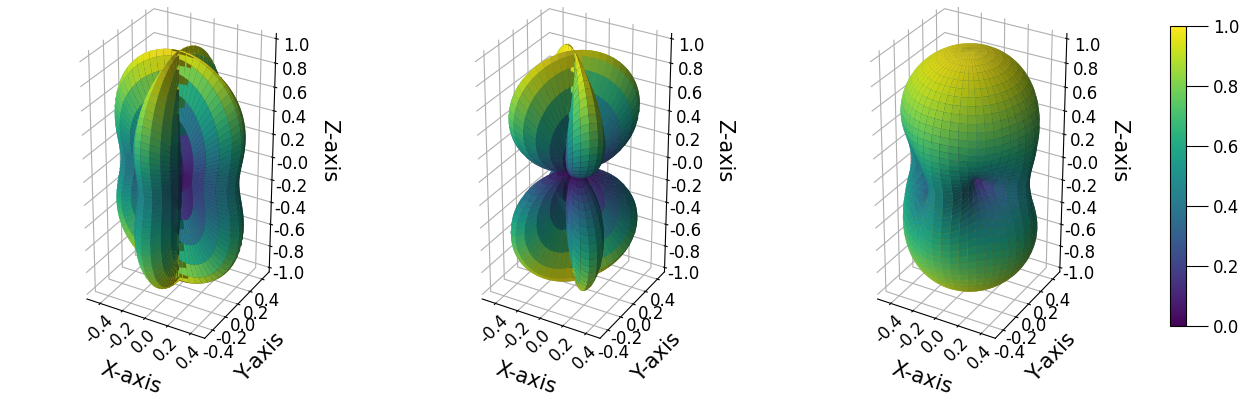

In [20]:
#fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (24,6), projection = "3d") 
fig = plt.figure(figsize = (16,6))

Xs = [X_cross, X_plus, X_pattern]
Ys = [Y_cross, Y_plus, Y_pattern]
Zs = [Z_cross, Z_plus, Z_pattern]
Rs = [R_cross, R_plus, R_pattern]

for X, Y, Z, R,i in zip(Xs, Ys, Zs,Rs,[1,2,3]):
    
    color_dimension = R # change to desired fourth dimension
    #print(np.shape(color_dimension))

    minn, maxx = color_dimension.min(), color_dimension.max()
    print(minn, maxx)
    norm = colors.Normalize(0,1)#(minn, maxx)
    m = cm.ScalarMappable(norm=norm, cmap='viridis')
    m.set_array([])
    fcolors = m.to_rgba(color_dimension)
    #print(np.shape(fcolors))
    
    
    ax = fig.add_subplot(1,3,i, projection='3d')
    plot = ax.plot_surface(
    X, Y, Z,  
    linewidth=0, antialiased=True, alpha=1, facecolors=fcolors)#, edgecolors = "yellow")

    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(-1., 1.)
    ax.set_box_aspect(aspect=(1, 1, 2))


    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.zaxis.set_rotate_label(False)  # disable automatic rotation
    ax.set_zlabel("Z-axis", labelpad = 17, rotation = 270)
    ax.tick_params(axis = "z",pad =5)
    ax.tick_params(axis = "x",rotation = 45, pad = -5)
    ax.tick_params(axis = "y", pad = -2)

    
    ax.set_box_aspect(aspect=(1, 1, 2))
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.01f}')
    ax.yaxis.set_major_formatter('{x:.01f}')
    ax.xaxis.set_major_formatter('{x:.01f}')
    ax.set_zticks(np.arange(-1, 1.2, 0.2))
    
    
fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.85, 0.25, 0.01, 0.5])

#cbar_ax = fig.add_subplot(1,4,4)
cmap = matplotlib.cm.viridis
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
colorbar = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)    
fig.colorbar(colorbar, cax=cbar_ax, shrink=10, aspect = 30)

plt.savefig("./Antenna_patterns.pdf", bbox_inches="tight")
plt.show()
plt.close()

## Free spectral range (f = c/(2L))

In [21]:
theta, phi = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
THETA, PHI = np.meshgrid(theta, phi)

R_cross, R_plus = np.abs(Antenna_patterns_full(f = c/(2*4000), theta = THETA, phi = PHI, u = [1,0,0], v = [0,1,0] , L = 4000))
R_pattern = np.sqrt(np.square(np.abs(R_cross))+np.square(np.abs(R_plus)))

In [22]:
X_cross = R_cross * np.sin(THETA) * np.cos(PHI)
Y_cross = R_cross * np.sin(THETA) * np.sin(PHI)
Z_cross = R_cross * np.cos(THETA)

X_plus = R_plus * np.sin(THETA) * np.cos(PHI)
Y_plus = R_plus * np.sin(THETA) * np.sin(PHI)
Z_plus = R_plus * np.cos(THETA)

X_pattern = R_pattern * np.sin(THETA) * np.cos(PHI)
Y_pattern = R_pattern * np.sin(THETA) * np.sin(PHI)
Z_pattern = R_pattern * np.cos(THETA)

6.184825331661808e-19 0.12827268837368844
0.0 0.2125267731656768
2.799353064307981e-17 0.21254919874992798


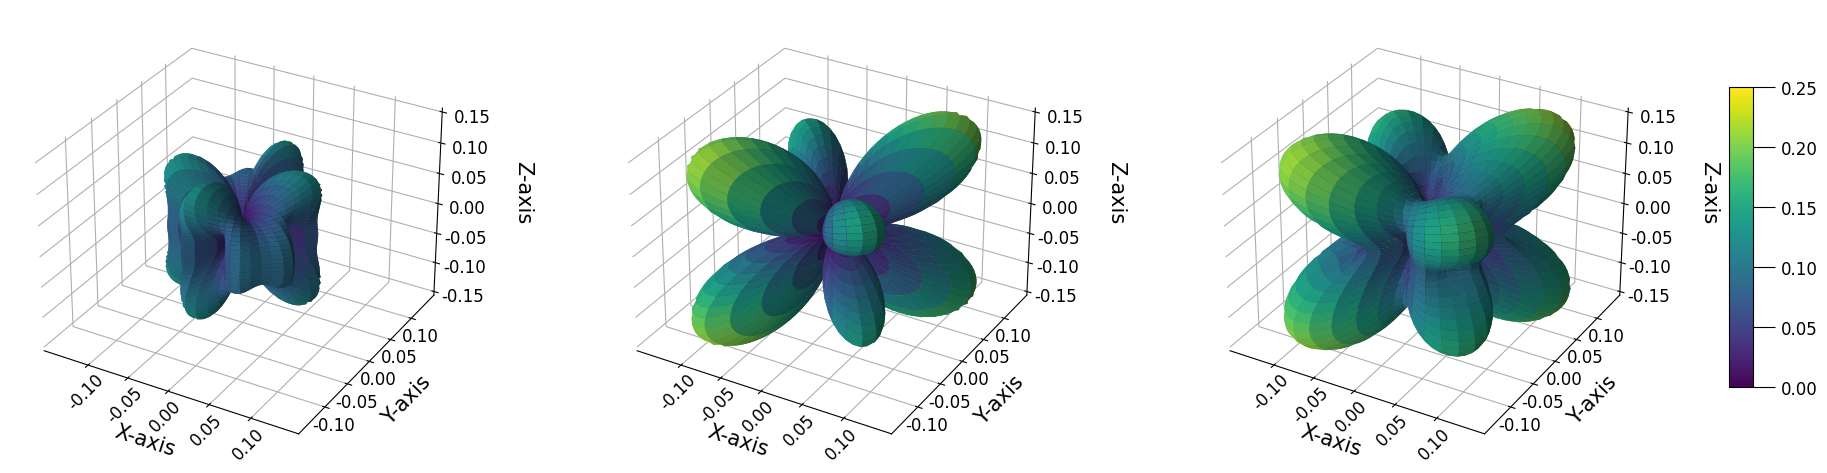

In [26]:
fig = plt.figure(figsize = (24,6))

Xs = [X_cross, X_plus, X_pattern]
Ys = [Y_cross, Y_plus, Y_pattern]
Zs = [Z_cross, Z_plus, Z_pattern]
Rs = [R_cross, R_plus, R_pattern]

for X, Y, Z, R,i in zip(Xs, Ys, Zs,Rs,[1,2,3]):
    
    color_dimension = R # change to desired fourth dimension
    #print(np.shape(color_dimension))

    minn, maxx = color_dimension.min(), color_dimension.max()
    print(minn, maxx)
    norm = colors.Normalize(0,0.25)#(minn, maxx)
    m = cm.ScalarMappable(norm=norm, cmap='viridis')
    m.set_array([])
    fcolors = m.to_rgba(color_dimension)
    #print(np.shape(fcolors))
    
    
    ax = fig.add_subplot(1,3,i, projection='3d')
    plot = ax.plot_surface(
    X, Y, Z,  
    linewidth=0, antialiased=True, alpha=1, facecolors=fcolors)#, edgecolors = "yellow")

    ax.set_xlim(-0.15, 0.15)
    ax.set_ylim(-0.15, 0.15)
    ax.set_zlim(-0.15, 0.15)
    #ax.set_box_aspect(aspect=(1, 1, 1))


    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.zaxis.set_rotate_label(False)  # disable automatic rotation
    ax.set_zlabel("Z-axis", labelpad = 17, rotation = 270)
    ax.tick_params(axis = "z",pad =5)
    ax.tick_params(axis = "x",rotation = 45, pad = -5)
    ax.tick_params(axis = "y", pad = -2)

    
    #ax.set_box_aspect(aspect=(1, 1, 2))
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')
    ax.yaxis.set_major_formatter('{x:.02f}')
    ax.xaxis.set_major_formatter('{x:.02f}')
    ax.set_zticks(np.arange(-0.15, 0.16, 0.05))
    ax.set_xticks(np.arange(-0.10, 0.11, 0.05))
    ax.set_yticks(np.arange(-0.10, 0.11, 0.05))
    
fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.85, 0.25, 0.01, 0.5])

#cbar_ax = fig.add_subplot(1,4,4)
cmap = matplotlib.cm.viridis
norm = matplotlib.colors.Normalize(vmin=0, vmax=0.25)
colorbar = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)    
fig.colorbar(colorbar, cax=cbar_ax, shrink=10, aspect = 30)

plt.savefig("./Antenna_patterns_free_spectral_range.pdf", bbox_inches="tight")
plt.show()
plt.close()